## 1. Lectura de les dades

En aquest apartat carreguem els conjunts de dades `diamonds-train.csv` i `diamonds-test.csv`, que contenen informació sobre les característiques dels diamants. 

Tenim un conjunt d'entrenament que es fa servir per entrenar i ajustar els models, mentre que el conjunt de test es fa servir exclusivament per avaluar la seva capacitat predictiva.


In [1]:
import pandas as pd

# Carreguem els conjunts de dades
train_df = pd.read_csv('diamonds-train.csv')
test_df = pd.read_csv('diamonds-test.csv')

# Mostrem les dimensions i les primeres files de cada conjunt
print(f"Conjunt d'entrenament: {train_df.shape[0]} files, {train_df.shape[1]} columnes")
display(train_df.head())
print(f"Conjunt de test: {test_df.shape[0]} files, {test_df.shape[1]} columnes")
display(test_df.head())

Conjunt d'entrenament: 44000 files, 11 columnes


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.53,Very Good,D,VS2,63.2,56.0,5.10,5.15,3.24,1601
1,2,0.32,Premium,H,VS2,62.4,58.0,4.36,4.33,2.71,648
2,3,0.76,Ideal,I,SI1,61.8,57.0,5.89,5.83,3.62,2399
3,4,1.01,Good,H,VS2,60.8,61.0,6.43,6.50,3.93,5229
4,5,0.73,Ideal,I,VS1,62.1,54.0,5.77,5.80,3.59,2167


Conjunt de test: 9940 files, 11 columnes


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,44001,1.09,Ideal,G,VVS2,62.5,56.0,6.54,6.58,4.10,8282
1,44002,0.70,Very Good,F,SI1,59.8,60.0,5.75,5.83,3.46,2196
2,44003,2.01,Good,I,SI1,58.8,60.0,8.27,8.19,4.84,16731
3,44004,0.27,Ideal,F,IF,61.8,55.0,4.14,4.21,2.57,760
4,44005,0.54,Premium,D,SI1,62.3,60.0,5.22,5.18,3.24,1715


#### Resultats de la lectura de dades

Després de carregar els datasets, hem obtingut els següents conjunts:

- **Conjunt d'entrenament (`train_df`)**: 44.000 files i 11 columnes.
- **Conjunt de test (`test_df`)**: 9.940 files i 11 columnes.

Tal i com se'ns proporcionava a l'enunciat.

Cada fila representa un diamant amb les seves característiques físiques i el seu preu. Les columnes són:

- `id`: identificador únic del diamant.
- `carat`: pes del diamant.
- `cut`: qualitat del tall, de pitjor a millor: *Fair*, *Good*, *Very Good*, *Premium*, *Ideal*.
- `color`: grau de color, de pitjor a millor: *J* a *D*.
- `clarity`: claredat, de pitjor a millor: *I1*, *SI2*, *SI1*, *VS2*, *VS1*, *VVS2*, *VVS1*, *IF*.
- `depth`: profunditat percentual (calculada com 2 * z / (x + y)).
- `table`: amplada de la taula del diamant.
- `x`, `y`, `z`: dimensions físiques del diamant en mil·límetres.
- `price`: preu en dòlars.

Aquestes dades seran les que utilitzarem al llarg de la pràctica per fer les prediccions, així com per explorar la relació entre les seves característiques.

---


## 2. Pre-processament de les dades
### a. Identificar els patrons amb dades "no físiques"
En aquest apartat volem detectar els valors que no són físicament possibles o que tenen errors evidents. A partir de la descripció dels atributs, les dades han de seguir les següents condicions:

- Els atributs `x`, `y` i `z` representen les dimensions del diamant en mil·límetres, i per tant **no poden ser menors o iguals a zero** o superar els valors **10,74, 58,9 i 31,8** respectivament.
- El valor de `depth` representa el percentatge de profunditat del diamant i ha d'estar dins del rang **43 a 79**.
- L'atribut `table` també ha d'estar dins del rang **43 a 95**.
- Els `preus` dels diamants es situen dins del rang de **325 i 18823**
- El `pes` dels diamants és d'entre **0,2 i 5,01**

Tots els registres que no compleixen aquestes condicions els considerem no físics. 


In [2]:
# Definim condicions per detectar valors invàlids
def detectar_no_fisics(df):
    return df[
        (df['price'] < 326) | (df['price'] > 18823) |
        (df['carat'] < 0.2) | (df['carat'] > 5.01) |
        (df['x'] <= 0) | (df['x'] > 10.74) |
        (df['y'] <= 0) | (df['y'] > 58.9) |
        (df['z'] <= 0) | (df['z'] > 31.8) |
        (df['depth'] < 43) | (df['depth'] > 79) |
        (df['table'] < 43) | (df['table'] > 95)
    ]

# Apliquem la funció als dos conjunts
non_physical_train = detectar_no_fisics(train_df)
non_physical_test = detectar_no_fisics(test_df)

# Resultats
print(f"Registres amb valors no físics al conjunt d'entrenament: {len(non_physical_train)}")
display(non_physical_train)

print(f"Registres amb valors no físics al conjunt de test: {len(non_physical_test)}")
display(non_physical_test)


Registres amb valors no físics al conjunt d'entrenament: 16


,id,carat,cut,color,clarity,depth,table,x,y,z,price
1577,1578,1.00,Very Good,H,VS2,63.3,53.0,0.00,0.00,0.0,5139
6555,6556,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383
9582,9583,2.80,Good,G,SI2,63.8,58.0,8.90,8.85,0.0,18788
9858,9859,1.56,Ideal,G,VS2,62.2,54.0,0.00,0.00,0.0,12800
11595,11596,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
11837,11838,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
13415,13416,1.15,Ideal,G,VS2,59.2,56.0,6.88,6.83,0.0,5564
14807,14808,1.00,Premium,G,SI2,59.1,59.0,6.55,6.48,0.0,3142
15634,15635,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
16397,16398,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167


Registres amb valors no físics al conjunt de test: 4


,id,carat,cut,color,clarity,depth,table,x,y,z,price
4205,48206,1.07,Ideal,F,SI2,61.6,56.0,0.00,6.62,0.0,4954
8430,52431,1.20,Premium,D,VVS1,62.1,59.0,0.00,0.00,0.0,15686
9202,53203,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
9931,53932,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631


#### Resultats:

Hem filtrat aquells registres que contenen valors fora dels límits. En el conjunt d'entrenament, hem identificat 16 registres amb valors no físics, i en el cas del conjunt de test, hem detectat 4 registres amb valors no físics. Els casos més típics de valors no físics han estat:

- **Dimensió z = 0** (profunditat zero).
- **x o y = 0** (longitud o amplada zero).
- A vegades, totes tres dimensions (`x`, `y`, `z`) són zero, cosa que no és possible per un diamant físic.

Els errors es concentren especialment en el valor de `z` (profunditat), que apareix a 0 en tots els casos, cosa que indica un error de mesura o d’entrada de dades.

És important que eliminem aquests registres abans d’entrenar qualsevol model, ja que podrien introduir soroll o fer que el model aprengui patrons erronis.


### b. Identificar outliers a partir de la distribució de cada atribut

Aquí busquem els valors atípics que, tot i ser físicament possibles, es troben molt allunyats del comportament habitual de la mostra. Per detectar-los, utilitzem la tècnics de l'IRQ (*Interquartile Range*):

1. Es calcula el primer quartil (Q1) i el tercer quartil (Q3) per cada atribut numèric.
2. Obtenim el rang: `IQR = Q3 - Q1`.
3. Hem determinat els límits:
   - Límits inferiors: `Q1 - 1.5 * IQR`
   - Límits superiors: `Q3 + 1.5 * IQR`
4. Considerem outliers els valors fora d’aquests límits.


In [3]:
import numpy as np

# Atributs numèrics a analitzar
numeric_cols = ['price', 'carat', 'x', 'y', 'z', 'depth', 'table']

# Funció per detectar outliers a partir de la distribució d’un DataFrame
def detectar_outliers_iqr(df, columnes):
    outliers_df = pd.DataFrame()
    for col in columnes:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"{col}: {len(col_outliers)} outliers")
        outliers_df = pd.concat([outliers_df, col_outliers])
    return outliers_df.drop_duplicates()

# Aplicació al conjunt d'entrenament
print("Outliers al conjunt d'entrenament:")
outliers_train = detectar_outliers_iqr(train_df, numeric_cols)
print(f"Total de registres amb almenys un outlier: {len(outliers_train)}")
display(outliers_train)

# Aplicació al conjunt de test
print("\nOutliers al conjunt de test:")
outliers_test = detectar_outliers_iqr(test_df, numeric_cols)
print(f"Total de registres amb almenys un outlier: {len(outliers_test)}")
display(outliers_test)


Outliers al conjunt d'entrenament:
price: 2907 outliers
carat: 1536 outliers
x: 27 outliers
y: 28 outliers
z: 41 outliers
depth: 2063 outliers
table: 490 outliers
Total de registres amb almenys un outlier: 5247


,id,carat,cut,color,clarity,depth,table,x,y,z,price
9,10,1.80,Ideal,F,SI1,61.4,54.0,7.86,7.82,4.81,16340
78,79,2.36,Ideal,H,SI2,62.2,55.0,8.51,8.56,5.30,17569
83,84,2.17,Premium,J,SI2,62.3,60.0,8.33,8.20,5.15,13395
111,112,1.72,Ideal,H,VS2,61.9,56.0,7.70,7.75,4.78,15197
115,116,1.66,Very Good,G,VS2,63.2,56.0,7.61,7.49,4.77,15229
...,...,...,...,...,...,...,...,...,...,...,...
43567,43568,1.14,Good,E,SI1,60.9,64.0,6.78,6.68,4.09,5899
43693,43694,0.96,Fair,F,I1,62.9,66.0,6.29,6.07,3.91,1917
43750,43751,1.01,Good,E,SI1,59.3,64.0,6.47,6.49,3.84,4399
43927,43928,0.71,Fair,I,VS2,61.6,67.0,5.76,5.61,3.50,1840



Outliers al conjunt de test:
price: 640 outliers
carat: 245 outliers
x: 5 outliers
y: 3 outliers
z: 9 outliers
depth: 482 outliers
table: 115 outliers
Total de registres amb almenys un outlier: 1167


,id,carat,cut,color,clarity,depth,table,x,y,z,price
2,44003,2.01,Good,I,SI1,58.8,60.0,8.27,8.19,4.84,16731
6,44007,1.52,Premium,G,VVS2,62.9,59.0,7.29,7.25,4.57,15404
31,44032,2.00,Good,J,VS2,58.0,62.0,8.17,8.25,4.76,13542
48,44049,1.60,Very Good,G,VS2,61.0,57.0,7.55,7.59,4.62,14383
60,44061,2.28,Ideal,J,SI1,61.6,57.0,8.50,8.43,5.21,12755
...,...,...,...,...,...,...,...,...,...,...,...
8930,52931,0.52,Fair,I,VVS2,60.4,66.0,5.26,5.20,3.16,1401
8976,52977,1.00,Good,H,VVS2,59.5,64.0,6.44,6.41,3.82,4592
9611,53612,0.30,Good,E,VVS2,59.8,64.0,4.34,4.29,2.58,1026
9635,53636,1.00,Good,I,SI1,62.9,64.0,6.27,6.23,3.93,3920


### c. Identificar outliers a partir de scatter plots atribut/preu.
Hem creat diagrames de dispersió entre la variable `price` i cada atribut numèric del conjunt de dades. Aquesta anàlisi visual permet detectar valors que, tot i estar dins dels rangs físics i estadístics, mostren un comportament inusual respecte al preu. Per exemple, un diamant amb pes molt alt (`carat`) però preu molt baix, o dimensions petites amb preus desproporcionadament elevats, poden indicar errors de mesura o anomalies.

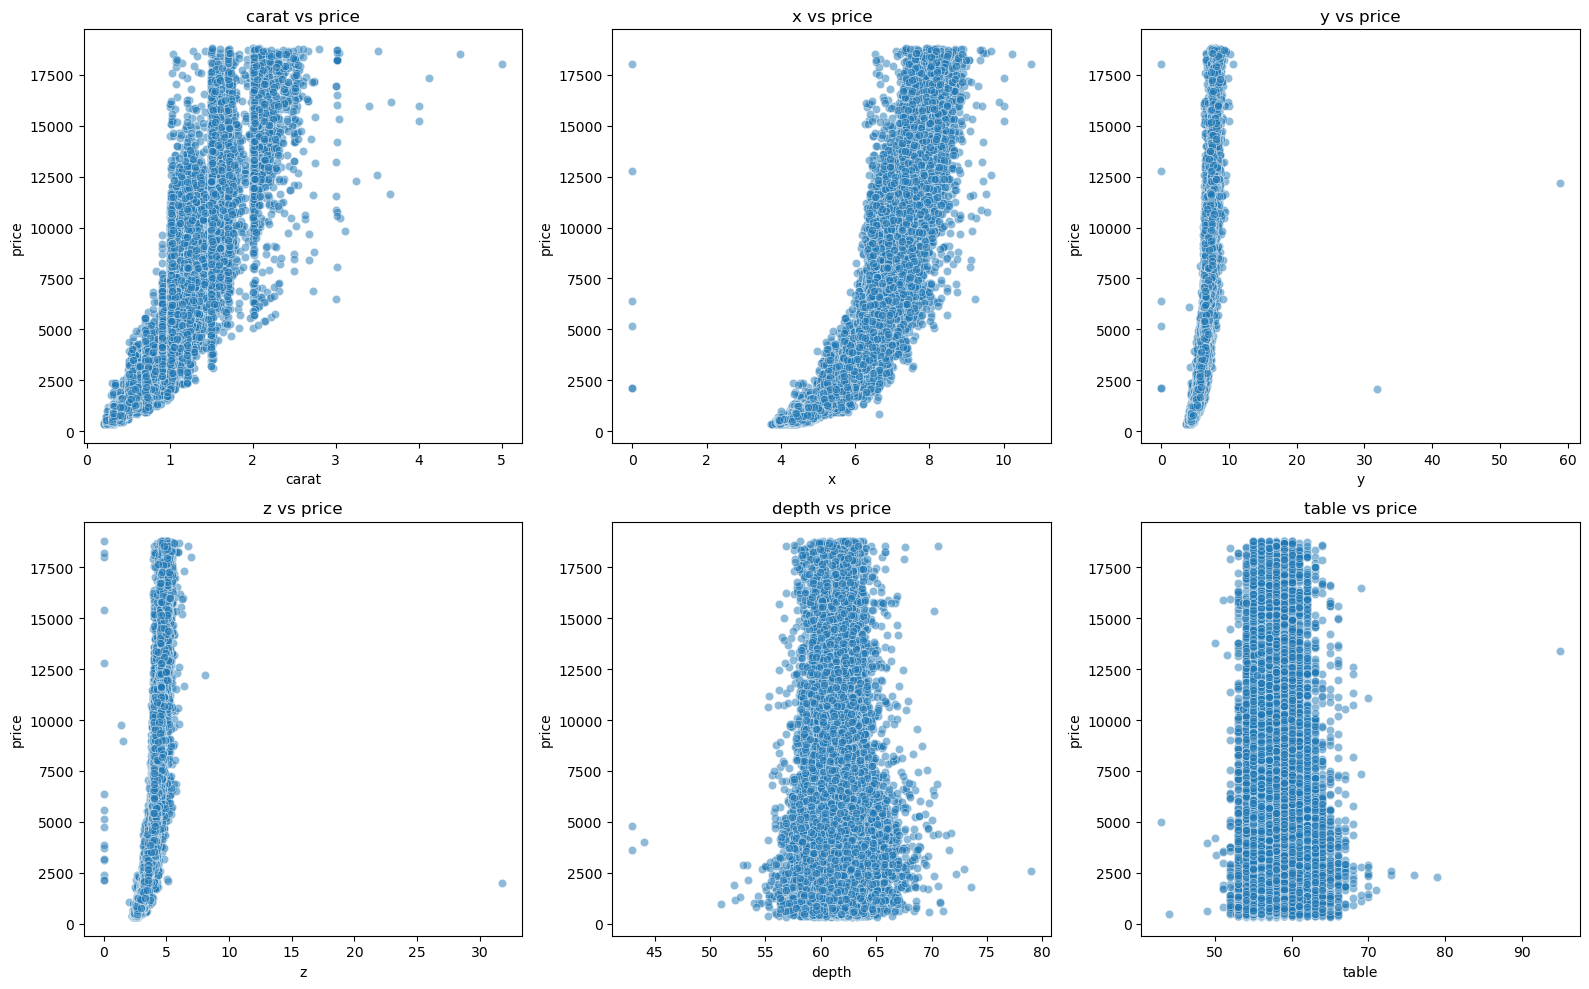

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atributs numèrics
numeric_cols = ['carat', 'x', 'y', 'z', 'depth', 'table']

plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=train_df, x=col, y='price', alpha=0.5)
    plt.title(f'{col} vs price')

plt.tight_layout()
plt.show()


#### Resultats

**1. `carat`vs `price`**
- Podem observar que a mesura que el pes augmenta, el preu augmenta, com és d'esperar.
- Outliers visibles:
  - Alguns diamants amb pes molt alt (> 3) tenen preus més baixos del que seria esperable.
  - També s’observen alguns punts amb carat < 0.5 i relativament alts, que podrien ser errors o diamants amb altres característiques no reflectides.

**Conclusió**: revisar diamants amb `carat > 3` i `price < 10000`, i amb `carat < 0.5` però `price > 15000`.

**2. `x` vs `price`**
- Observem una relació positiva coherent (com x més gran implica més preu), però més dispersa que carat.
- Outliers visibles:
  - Valors molt baixos de x (menys de 2 o 3 mm) amb preus alts.
  - Alguns punts amb x alta però preus relativament baixos també poden ser fora de tendència.

**Conclusió**: revisar valors de `x`, especialment propers als extrems.

**3. `y` vs `price`**

* S’observa una **anomalia clara**: un punt amb `y` > 50 mm i preu mitjà. Aquest valor és molt fora del rang habitual (la majoria entre 4 i 12).
* També hi ha alguns punts amb `y ≈ 0`, que podrien ser errors de mesura.

**Conclusió**:

* El punt amb `y ≈ 58.9` pot ser un **error clar**.
* Valors molt petits (`y < 1`) també són sospitosos.

---

####  4. `z` vs `price`

* Relació menys clara, però amb comportament concentrat.
* **Outliers evidents**:

  * Un punt amb `z > 30`, que és molt fora del normal.
  * Alguns amb `z ≈ 0`, que són errors físics o d’entrada.

**Conclusió**: revisar tots els valors amb `z < 1` o `z > 15`.

---

#### 5. `depth` vs `price`

* Distribució bastant horitzontal i compacta entre valors de `depth` entre 55 i 65.
* **Outliers**:

  * Valors extrems de `depth` (per sota de 50 o per sobre de 75) que no tenen cap tendència clara amb el preu i podrien ser errors o formats no habituals.

**Conclusió**: revisar `depth < 50` o `depth > 75`.

---

#### 6. `table` vs `price`

* Molta dispersió, sense tendència forta amb el preu.
* **Outliers clars**:

  * Un punt amb `table` > 90 i preu mitjà.
  * Alguns amb `table` < 45.

**Conclusió**: revisar valors amb `table < 45` o `table > 90`.

---

#### Resum general

Punts sospitosos o outliers visuals a revisar:

* `carat` < 0.5 amb preus molt alts o `carat` > 3 amb preus molt baixos.
* `x`, `y`, `z` ≈ 0 o exageradament alts (especialment `y > 50`, `z > 30`).
* `depth` i `table` fora dels seus rangs normals, especialment si no tenen correlació amb el preu.



### d. Fer una taula amb els identificadors dels outliers, els seus atributs, i les raons per la qual cadascú es considera outlier.
Explicació

In [5]:
# Creem una llista per guardar informació dels outliers
outliers_list = []

# Funció per afegir l'entrada a la llista amb el motiu
def add_outlier(row, reason):
    outliers_list.append({
        'id': row['id'],
        'carat': row['carat'],
        'x': row['x'],
        'y': row['y'],
        'z': row['z'],
        'depth': row['depth'],
        'table': row['table'],
        'price': row['price'],
        'reason': reason
    })

# carat outliers visuals
carat_outliers = train_df[(train_df['carat'] < 0.5) & (train_df['price'] > 15000)]
for _, row in carat_outliers.iterrows():
    add_outlier(row, 'carat molt petit amb preu molt alt')

carat_outliers2 = train_df[(train_df['carat'] > 3) & (train_df['price'] < 10000)]
for _, row in carat_outliers2.iterrows():
    add_outlier(row, 'carat molt gran amb preu baix')

# x, y, z ≈ 0
for axis in ['x', 'y', 'z']:
    axis_outliers = train_df[train_df[axis] < 1]
    for _, row in axis_outliers.iterrows():
        add_outlier(row, f'{axis} gairebé 0')

# y > 50
y_outliers = train_df[train_df['y'] > 50]
for _, row in y_outliers.iterrows():
    add_outlier(row, 'y molt alt (> 50)')

# z > 30
z_outliers = train_df[train_df['z'] > 30]
for _, row in z_outliers.iterrows():
    add_outlier(row, 'z molt alt (> 30)')

# depth < 50 o > 75
depth_outliers = train_df[(train_df['depth'] < 50) | (train_df['depth'] > 75)]
for _, row in depth_outliers.iterrows():
    add_outlier(row, 'depth fora de rang raonable')

# table < 45 o > 90
table_outliers = train_df[(train_df['table'] < 45) | (train_df['table'] > 90)]
for _, row in table_outliers.iterrows():
    add_outlier(row, 'table fora de rang raonable')
# Convertim a dataframe i eliminem els duplicats

outlier_df = pd.DataFrame(outliers_list)
outlier_df = outlier_df.drop_duplicates(subset='id')  # cada diamant només una vegada

# Mostrem els resultats
print(f"Nombre total d'outliers visuals identificats: {len(outlier_df)}")
display(outlier_df)


Nombre total d'outliers visuals identificats: 27


,id,carat,x,y,z,depth,table,price,reason
0,15646,3.01,9.10,8.97,5.67,62.7,58.0,8040,carat molt gran amb preu baix
1,40623,3.11,9.15,9.02,5.98,65.9,57.0,9823,carat molt gran amb preu baix
2,1578,1.00,0.00,0.00,0.00,63.3,53.0,5139,x gairebé 0
3,9859,1.56,0.00,0.00,0.00,62.2,54.0,12800,x gairebé 0
4,11596,1.14,0.00,0.00,0.00,57.5,67.0,6381,x gairebé 0
5,11838,0.71,0.00,0.00,0.00,64.1,60.0,2130,x gairebé 0
6,15635,0.71,0.00,0.00,0.00,64.1,60.0,2130,x gairebé 0
7,30338,2.25,0.00,0.00,0.00,62.8,59.0,18034,x gairebé 0
15,6556,1.12,6.71,6.67,0.00,60.4,59.0,2383,z gairebé 0
16,9583,2.80,8.90,8.85,0.00,63.8,58.0,18788,z gairebé 0


### e. Decidir què fer amb els outliers i aplicar-ho als conjunts de dades

Per garantir que els models s'entrenin amb dades representatives i coherents, hem eliminat els registres considerats outliers segons:

- Valors físicament invàlids.
- Valors extrems detectats via distribució (IQR).
- Anomalies visuals evidents en scatter plots.

Al conjunt de test només s'han eliminat valors físicament invàlids, ja que no podem utilitzar informació d’aquest conjunt per a l’anàlisi prèvia.

In [6]:
# 1. Unim tots els identificadors d'outliers
ids_outliers = set(non_physical_train['id']) \
    .union(outliers_train['id']) \
    .union(outlier_df['id'])

print(f"Total d'outliers únics a eliminar del conjunt d'entrenament: {len(ids_outliers)}")

# 2. Eliminem els outliers del conjunt d'entrenament
train_df_clean = train_df[~train_df['id'].isin(ids_outliers)].copy()
print(f"Tamany original del train_df: {len(train_df)}")
print(f"Tamany net del train_df_clean: {len(train_df_clean)}")


# 1. Unir els identificadors d'outliers visuals i no físics del conjunt de test
ids_outliers_test = set(non_physical_test['id']) \
    .union(outliers_test['id'])

print(f"Total d'outliers únics a eliminar del conjunt de test: {len(ids_outliers_test)}")

# 2. Eliminar del conjunt de test
test_df_clean = test_df[~test_df['id'].isin(ids_outliers_test)].copy()
print(f"Tamany original del test_df: {len(test_df)}")
print(f"Tamany net del test_df_clean: {len(test_df_clean)}")



Total d'outliers únics a eliminar del conjunt d'entrenament: 5247
Tamany original del train_df: 44000
Tamany net del train_df_clean: 38753
Total d'outliers únics a eliminar del conjunt de test: 1167
Tamany original del test_df: 9940
Tamany net del test_df_clean: 8773


f. Convertir els atributs categòrics en numèrics. Observeu que, per la seva
semàntica, els valors de cada atribut categòric estan ordenats, i per tant una
representació numèrica té més sentit que un one-hot encoding.


In [7]:
# Diccionaris d'ordenació
ordinal_maps = {
    'cut': {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4},
    'color': {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6},
    'clarity': {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
}

# Apliquem els mappings al train i al test netejats
for col, mapping in ordinal_maps.items():
    train_df_clean[col] = train_df_clean[col].map(mapping)
    test_df_clean[col] = test_df_clean[col].map(mapping)
    

display(train_df_clean.head())
display(test_df_clean.head())

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.53,2,6,3,63.2,56.0,5.10,5.15,3.24,1601
1,2,0.32,3,2,3,62.4,58.0,4.36,4.33,2.71,648
2,3,0.76,4,1,2,61.8,57.0,5.89,5.83,3.62,2399
3,4,1.01,1,2,3,60.8,61.0,6.43,6.50,3.93,5229
4,5,0.73,4,1,4,62.1,54.0,5.77,5.80,3.59,2167


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,44001,1.09,4,3,5,62.5,56.0,6.54,6.58,4.10,8282
1,44002,0.70,2,4,2,59.8,60.0,5.75,5.83,3.46,2196
3,44004,0.27,4,4,7,61.8,55.0,4.14,4.21,2.57,760
4,44005,0.54,3,6,2,62.3,60.0,5.22,5.18,3.24,1715
7,44008,1.00,4,4,1,62.7,57.0,6.37,6.42,4.01,4721


### g. Estandaritzar tots els atributs per separat, excepte x, y, z i price.
En aquest apartat estandaritzem (mitjana 0 i desviació típica 1) tots els atributs numèrics excepte:

- x, y, z
- price

id (no es fa servir)

i tampoc cal tocar log_price, high_price, etc., si ja existeixen

✅ Passos:
Seleccionem els atributs a escalar (tots menys els exclosos).

Apliquem StandardScaler de sklearn.

S'ajusta amb el train_df_clean i s'aplica tant al train com al test.

In [8]:
from sklearn.preprocessing import StandardScaler

# Atributs que volem estandarditzar
features_to_scale = ['carat', 'depth', 'table', 'cut', 'color', 'clarity']

# Inicialitzem l'escalador
scaler = StandardScaler()

# Estandarditzem el train
train_df_clean[features_to_scale] = scaler.fit_transform(train_df_clean[features_to_scale])

# Estandarditzem el test amb els paràmetres del train
test_df_clean[features_to_scale] = scaler.transform(test_df_clean[features_to_scale])

display(train_df_clean.head())
display(test_df_clean.head())

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,-0.481466,-0.999099,1.504197,-0.078711,1.277559,-0.621747,5.10,5.15,3.24,1601
1,2,-1.048664,-0.018447,-0.870156,-0.078711,0.554106,0.369136,4.36,4.33,2.71,648
2,3,0.139750,0.962204,-1.463745,-0.686214,0.011516,-0.126305,5.89,5.83,3.62,2399
3,4,0.814985,-1.979751,-0.870156,-0.078711,-0.892800,1.855459,6.43,6.50,3.93,5229
4,5,0.058722,0.962204,-1.463745,0.528793,0.282811,-1.612629,5.77,5.80,3.59,2167


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,44001,1.031061,0.962204,-0.276568,1.136296,0.644537,-0.621747,6.54,6.58,4.10,8282
1,44002,-0.022306,-0.999099,0.317021,-0.686214,-1.797116,1.360018,5.75,5.83,3.46,2196
3,44004,-1.183711,0.962204,0.317021,2.351303,0.011516,-1.117188,4.14,4.21,2.57,760
4,44005,-0.454457,-0.018447,1.504197,-0.686214,0.463674,1.360018,5.22,5.18,3.24,1715
7,44008,0.787976,0.962204,0.317021,-1.293718,0.825401,-0.126305,6.37,6.42,4.01,4721


### h. Escala x, y i z entre -1 i 1, però de forma conjunta, no cada atribut per separat. És dir, fer les correspondències min(x, y, z) → -1, max(x, y, z) → 1.

In [9]:
# Combinar x, y, z de train i test en un sol array pla
xyz_all = pd.concat([
    train_df_clean[['x', 'y', 'z']],
    test_df_clean[['x', 'y', 'z']]
], ignore_index=True)

# Convertim a array pla i trobem min i max globals
xyz_values = xyz_all.values.flatten()
min_xyz = xyz_values.min()
max_xyz = xyz_values.max()

print(f"Escalat global: min = {min_xyz}, max = {max_xyz}")

# Funció d’escalat conjunt
def escala_xyz(df, min_val, max_val):
    return 2 * (df[['x', 'y', 'z']] - min_val) / (max_val - min_val) - 1

# Apliquem al train i al test
train_df_clean[['x', 'y', 'z']] = escala_xyz(train_df_clean, min_xyz, max_xyz)
test_df_clean[['x', 'y', 'z']] = escala_xyz(test_df_clean, min_xyz, max_xyz)

display(train_df_clean.head())
display(test_df_clean.head())


Escalat global: min = 1.41, max = 8.29


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,-0.481466,-0.999099,1.504197,-0.078711,1.277559,-0.621747,0.072674,0.087209,-0.468023,1601
1,2,-1.048664,-0.018447,-0.870156,-0.078711,0.554106,0.369136,-0.142442,-0.151163,-0.622093,648
2,3,0.139750,0.962204,-1.463745,-0.686214,0.011516,-0.126305,0.302326,0.284884,-0.357558,2399
3,4,0.814985,-1.979751,-0.870156,-0.078711,-0.892800,1.855459,0.459302,0.479651,-0.267442,5229
4,5,0.058722,0.962204,-1.463745,0.528793,0.282811,-1.612629,0.267442,0.276163,-0.366279,2167


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,44001,1.031061,0.962204,-0.276568,1.136296,0.644537,-0.621747,0.491279,0.502907,-0.218023,8282
1,44002,-0.022306,-0.999099,0.317021,-0.686214,-1.797116,1.360018,0.261628,0.284884,-0.404070,2196
3,44004,-1.183711,0.962204,0.317021,2.351303,0.011516,-1.117188,-0.206395,-0.186047,-0.662791,760
4,44005,-0.454457,-0.018447,1.504197,-0.686214,0.463674,1.360018,0.107558,0.095930,-0.468023,1715
7,44008,0.787976,0.962204,0.317021,-1.293718,0.825401,-0.126305,0.441860,0.456395,-0.244186,4721


i. Com el preu té un rang de variació que s’estén tres ordres de magnitud, en lloc
de treballar amb el preu és millor fer-ho amb el seu logaritme. Per tant, calculeu
el logaritme dels preus, guardeu-ho en un nou atribut log_price, i apliqueu un
escalament lineal entre 0.1 i 0.9.

1. Calcular log_price = log(price)

2. Escalar log_price entre 0.1 i 0.9 de manera lineal

3. Afegir dues columnes:

    3.1. log_price: el logaritme natural del preu

    3.2. log_price_scaled: el logaritme escalat entre [0.1, 0.9]

In [10]:
import numpy as np

# Calculem log(price) al train
train_df_clean['log_price'] = np.log(train_df_clean['price'])

# Calculem els valors mínim i màxim del logaritme (només amb el train!)
min_log = train_df_clean['log_price'].min()
max_log = train_df_clean['log_price'].max()

# Funció per escalar entre 0.1 i 0.9
def escalar_log(log_vals, min_val, max_val):
    return 0.1 + 0.8 * (log_vals - min_val) / (max_val - min_val)

# Apliquem l’escalat al train i test
train_df_clean['log_price_scaled'] = escalar_log(train_df_clean['log_price'], min_log, max_log)

test_df_clean['log_price'] = np.log(test_df_clean['price'])
test_df_clean['log_price_scaled'] = escalar_log(test_df_clean['log_price'], min_log, max_log)

display(train_df_clean[['price', 'log_price', 'log_price_scaled']])
display(test_df_clean[['price', 'log_price', 'log_price_scaled']])

,price,log_price,log_price_scaled
0,1601,7.378384,0.454284
1,648,6.473891,0.252933
2,2399,7.782807,0.544314
3,5229,8.561975,0.717766
4,2167,7.681099,0.521673
...,...,...,...
43994,743,6.610696,0.283388
43995,4590,8.431635,0.688751
43996,877,6.776507,0.320299
43997,765,6.639876,0.289883


,price,log_price,log_price_scaled
0,8282,9.021840,0.820138
1,2196,7.694393,0.524632
3,760,6.633318,0.288424
4,1715,7.447168,0.469597
7,4721,8.459776,0.695016
...,...,...,...
9932,2583,7.856707,0.560765
9933,7191,8.880586,0.788693
9934,2728,7.911324,0.572923
9936,9817,9.191871,0.857989


In [11]:
# Afegeix la columna high_price (1 si preu ≥ 2500, 0 si preu < 2500)
train_df_clean['high_price'] = (train_df_clean['price'] >= 2500).astype(int)
test_df_clean['high_price'] = (test_df_clean['price'] >= 2500).astype(int)

display(train_df_clean[['price', 'high_price']].head(10))
display(test_df_clean[['price', 'high_price']].head(10))

print("Train:")
print(train_df_clean['high_price'].value_counts())

print("\nTest:")
print(test_df_clean['high_price'].value_counts())



,price,high_price
0,1601,0
1,648,0
2,2399,0
3,5229,1
4,2167,0
5,732,0
6,482,0
7,430,0
8,2409,0
10,4819,1


,price,high_price
0,8282,1
1,2196,0
3,760,0
4,1715,0
7,4721,1
8,1020,0
9,984,0
10,6487,1
11,4398,1
12,707,0


Train:
high_price
0    21540
1    17213
Name: count, dtype: int64

Test:
high_price
0    4902
1    3871
Name: count, dtype: int64


## 3. Predicció del preu:
### a. Es vol predir el preu dels diamants (de fet, el logaritme del preu escalat).

In [12]:
# Variables que no s'han d'utilitzar com a entrades
exclude_cols = ['id', 'price', 'log_price', 'log_price_scaled', 'high_price']

# Definim X i y
X_train = train_df_clean.drop(columns=exclude_cols)
y_train = train_df_clean['log_price_scaled']

X_test = test_df_clean.drop(columns=exclude_cols)
y_test = test_df_clean['log_price_scaled']


### b. S’han d’utilitzar els següents mètodes de predicció:
#### i. Regressió multilineal (MLR).

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

mlr = LinearRegression()

# Cross-validation (5 folds) sobre l'entrenament
scores_mlr = cross_val_score(mlr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print("MAE mitjà (MLR - CV):", -scores_mlr.mean())

# Entrenament final sobre totes les dades d'entrenament
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)


MAE mitjà (MLR - CV): 0.024259000029335134


#### ii. K-Nearest Neighbors (k-NN).


In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Busquem el millor valor de k
knn = KNeighborsRegressor()
param_grid = {'n_neighbors': list(range(3, 21))}

grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_knn.fit(X_train, y_train)

best_k = grid_knn.best_params_['n_neighbors']
print(f"Millor k: {best_k}, MAE mitjà (CV): {-grid_knn.best_score_:.5f}")

# Model definitiu
knn_final = KNeighborsRegressor(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred_knn = knn_final.predict(X_test)

Millor k: 9, MAE mitjà (CV): 0.02749


#### iii. Multilayer Neural Network amb Back-Propagation (MLNN-BP).

In [15]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', max_iter=500, random_state=42)
scores_mlp = cross_val_score(mlp, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print("MAE mitjà (MLP - CV):", -scores_mlp.mean())

# Model definitiu
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

MAE mitjà (MLP - CV): 0.022432538068557648


### c. Utilitzeu cross-validation per a ajustar els paràmetres dels models, i un cop decidits els paràmetres, mesurar la qualitat prevista de la predicció. Tot això es fa sobre el conjunt d’entrenament proporcionat, que es dividirà en diferents subconjunts d’entrenament i validació en el procés de cross-validation.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

#### Regressió Multilineal (MLR)

In [17]:
mlr = LinearRegression()
scores_mlr = cross_val_score(mlr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
mae_mlr_cv = -scores_mlr.mean()
print(f"MAE mitjà (MLR - CV): {mae_mlr_cv:.5f}")

MAE mitjà (MLR - CV): 0.02426


#### K-Nearest Neighbors (k-NN)

In [18]:
param_grid_knn = {'n_neighbors': list(range(3, 21))}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='neg_mean_absolute_error')
grid_knn.fit(X_train, y_train)
best_k = grid_knn.best_params_['n_neighbors']
mae_knn_cv = -grid_knn.best_score_
print(f"Millor k: {best_k}, MAE mitjà (k-NN - CV): {mae_knn_cv:.5f}")

Millor k: 9, MAE mitjà (k-NN - CV): 0.02749


#### Multilayer Neural Network (MLNN-BP)

In [19]:
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    max_iter=500,
    random_state=42
)
scores_mlp = cross_val_score(mlp, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
mae_mlp_cv = -scores_mlp.mean()
print(f"MAE mitjà (MLNN - CV): {mae_mlp_cv:.5f}")

MAE mitjà (MLNN - CV): 0.02243


### d. Un cop decidits els paràmetres i avaluada la qualitat prevista de la predicció, utilitzeu tot el conjunt d’entrenament per a ajustar el model predictiu definitiu que s’aplicarà al conjunt de test.
#### Model definitiu - Regressió Multilineal (MLR)

In [20]:
mlr_final = LinearRegression()
mlr_final.fit(X_train, y_train)
y_pred_mlr = mlr_final.predict(X_test)

#### Model definitiu - k-Nearest Neighbors (k-NN)

In [21]:
knn_final = KNeighborsRegressor(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred_knn = knn_final.predict(X_test)

#### Model definitiu - Multilayer Neural Network (MLNN-BP)

In [22]:
mlp_final = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    max_iter=500,
    random_state=42
)
mlp_final.fit(X_train, y_train)
y_pred_mlp = mlp_final.predict(X_test)

### e. La mesura de qualitat de la predicció que s’ha d’utilitzar és el Mean Absolute Percentage Error (MAPE), on 𝑦^𝜇 és la predicció i 𝑧^𝜇 el valor real corresponents al patró 𝜇-èssim. Aquests valors han de representar preus en USD ($), no els seus transformats utilitzats durant l’entrenament.

In [23]:
# Invertim l'escalat log_price_scaled → log_price
def inverse_scale_log_price(scaled_log_p):
    return min_log + (scaled_log_p - 0.1) * (max_log - min_log) / 0.8

# Convertim log_price → price en USD
def log_to_price(log_p):
    return np.exp(log_p)

# Destransformem les prediccions
price_pred_mlr = log_to_price(inverse_scale_log_price(y_pred_mlr))
price_pred_knn = log_to_price(inverse_scale_log_price(y_pred_knn))
price_pred_mlp = log_to_price(inverse_scale_log_price(y_pred_mlp))

# Valors reals de preus
price_real = test_df_clean['price'].values

# Fórmula del MAPE
def mape(y_true, y_pred):
    return 100 * np.mean(np.abs((y_pred - y_true) / y_true))

# Càlcul del MAPE per cada model
mape_mlr = mape(price_real, price_pred_mlr)
mape_knn = mape(price_real, price_pred_knn)
mape_mlp = mape(price_real, price_pred_mlp)

print(f"MAPE MLR: {mape_mlr:.2f}%")
print(f"MAPE k-NN: {mape_knn:.2f}%")
print(f"MAPE MLNN-BP: {mape_mlp:.2f}%")


MAPE MLR: 11.13%
MAPE k-NN: 12.02%
MAPE MLNN-BP: 9.18%


### f. Fer prediccions dels preus (en USD) sobre el conjunt de test per a cada model de predicció i analitzeu els resultats:
#### i. Calculeu el MAPE en el conjunt de test per a cada model.

In [24]:
# Mostrem els resultats finals de l'error de predicció
print("===== MAPE sobre el conjunt de test (preus en USD) =====")
print(f"MLR      → MAPE: {mape_mlr:.2f}%")
print(f"k-NN     → MAPE: {mape_knn:.2f}%")
print(f"MLNN-BP  → MAPE: {mape_mlp:.2f}%")

===== MAPE sobre el conjunt de test (preus en USD) =====
MLR      → MAPE: 11.13%
k-NN     → MAPE: 12.02%
MLNN-BP  → MAPE: 9.18%


#### ii. Genereu un dataframe amb els atributs originals més les prediccions dels tres models, amb noms pred_price_mlr, pred_price_knn, pred_price_bp.

In [25]:
# Copiem el test_df_clean per no modificar l'original
df_results = test_df_clean.copy()

# Afegim les prediccions de preu (en USD) com a noves columnes
df_results['pred_price_mlr'] = price_pred_mlr
df_results['pred_price_knn'] = price_pred_knn
df_results['pred_price_bp'] = price_pred_mlp  # MLNN-BP

# Mostrem les primeres files per verificar
df_results[['price', 'pred_price_mlr', 'pred_price_knn', 'pred_price_bp']].head()

,price,pred_price_mlr,pred_price_knn,pred_price_bp
0,8282,7278.454259,8980.815122,8166.007530
1,2196,2333.073670,2205.378556,2454.204066
3,760,763.556991,983.598694,785.319578
4,1715,1737.527607,1352.787419,1593.174734
7,4721,4366.284414,4416.670194,4110.666150


#### iii. Feu scatter plots entre el valor real del preu i la seva predicció per a cada model.

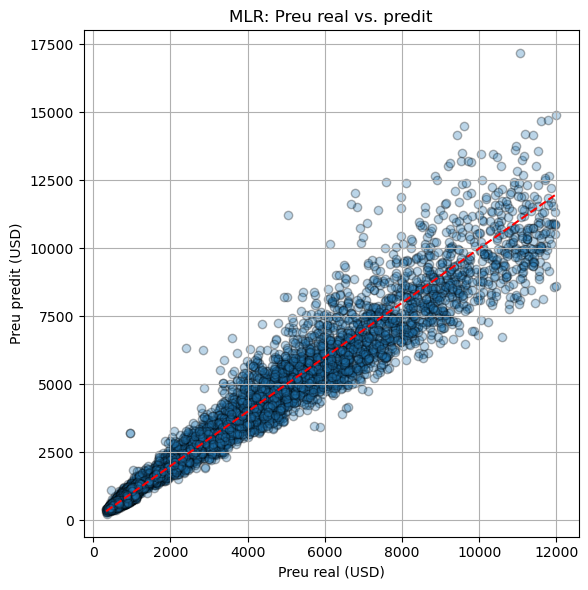

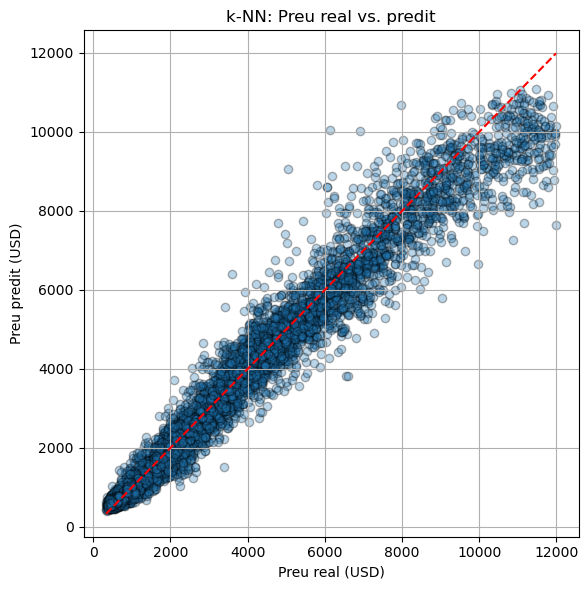

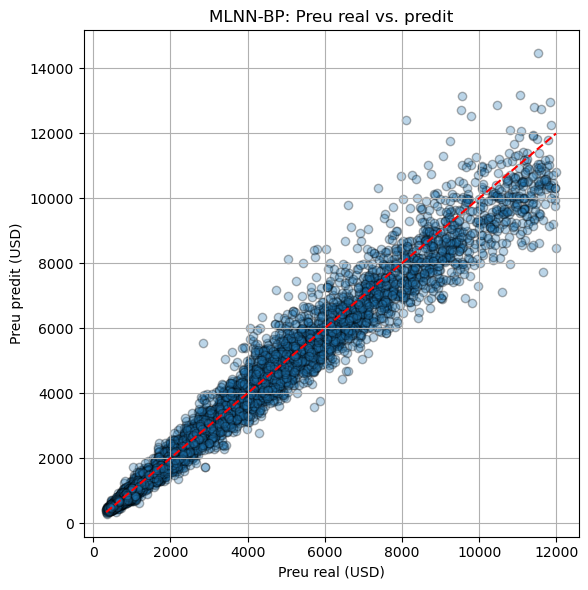

In [26]:
import matplotlib.pyplot as plt

# Funció auxiliar per fer scatter plots
def plot_real_vs_pred(real, pred, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(real, pred, alpha=0.3, edgecolors='k')
    plt.plot([real.min(), real.max()], [real.min(), real.max()], 'r--')
    plt.xlabel("Preu real (USD)")
    plt.ylabel("Preu predit (USD)")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Scatter plot per MLR
plot_real_vs_pred(df_results['price'], df_results['pred_price_mlr'], "MLR: Preu real vs. predit")

# Scatter plot per k-NN
plot_real_vs_pred(df_results['price'], df_results['pred_price_knn'], "k-NN: Preu real vs. predit")

# Scatter plot per MLNN-BP
plot_real_vs_pred(df_results['price'], df_results['pred_price_bp'], "MLNN-BP: Preu real vs. predit")


#### g. Discutiu i elaboreu conclusions a partir dels resultats obtinguts.


###### discutir no discutim, concluim que no tenim nidea de que estem fent

### 4. Classificació del preu:
#### a. Es vol classificar els patrons en funció de si tenen un preu alt o no, segons la variable high_price.